# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
dt=pd.read_excel(r"C:\Users\Shubham\Desktop\Data Science\Data Science Class\Practice Datasets-20230508T093234Z-001\Practice Datasets\matches.xlsx")
dt.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Shape

In [197]:
dt.shape

(636, 18)

- 636- rows and 18- columns

# Columns

In [198]:
dt.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Basic information

In [199]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

# Null values

In [200]:
dt.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [202]:
dt.drop(['id','date','umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [203]:
dt.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


# Number of seasons

In [204]:
dt.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Nuber of matches in each season

In [205]:
no_of_matches=pd.DataFrame({'Year':dt.season.value_counts().index,'Matches':dt.season.value_counts().values})
no_of_matches=no_of_matches.sort_values(by='Matches',ascending=False)
no_of_matches

,Year,Matches
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2017,59
7,2015,59
8,2008,58
9,2009,57


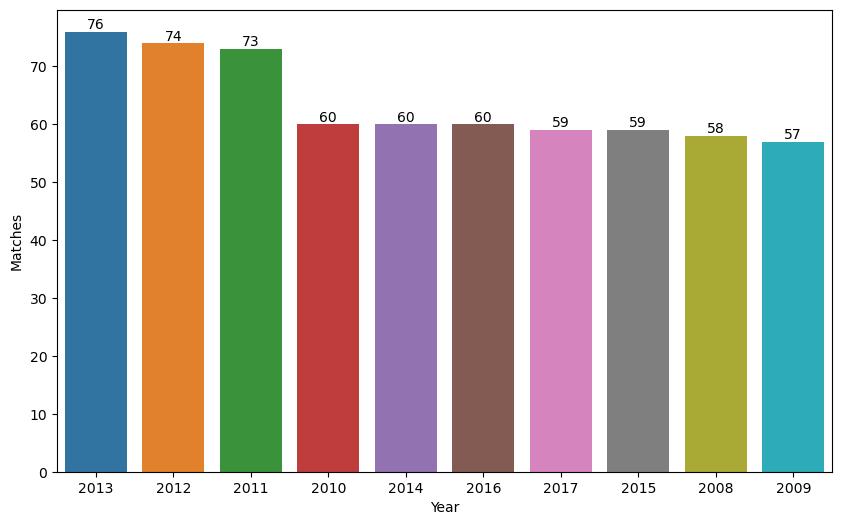

In [206]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='Year',y='Matches',data=no_of_matches,order=no_of_matches['Year'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# The names of the cities where matches are played

In [208]:
dt.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

# The number of matches played in a particular city

In [209]:
city=dt.city.value_counts()
city

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

# Cities where more than 40 matches have been played

In [210]:
city[city>=40]

Mumbai        85
Bangalore     66
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Name: city, dtype: int64

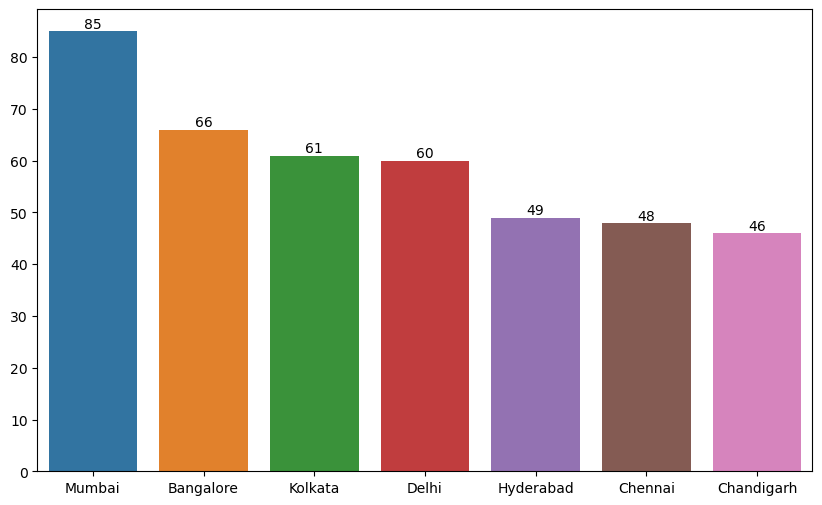

In [211]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x=city[city>=40].index,y=city[city>=40].values)
for i in ax.containers:
    ax.bar_label(i)

# The percentage of the most matches played in a city

In [212]:
dt.city.value_counts()*100/len(dt)

Mumbai            13.364780
Bangalore         10.377358
Kolkata            9.591195
Delhi              9.433962
Hyderabad          7.704403
Chennai            7.547170
Chandigarh         7.232704
Jaipur             5.188679
Pune               5.031447
Durban             2.358491
Ahmedabad          1.886792
Centurion          1.886792
Visakhapatnam      1.729560
Rajkot             1.572327
Dharamsala         1.415094
Johannesburg       1.257862
Cape Town          1.100629
Abu Dhabi          1.100629
Ranchi             1.100629
Port Elizabeth     1.100629
Cuttack            1.100629
Raipur             0.943396
Sharjah            0.943396
Kochi              0.786164
Indore             0.786164
Kanpur             0.628931
Nagpur             0.471698
Kimberley          0.471698
East London        0.471698
Bloemfontein       0.314465
Name: city, dtype: float64

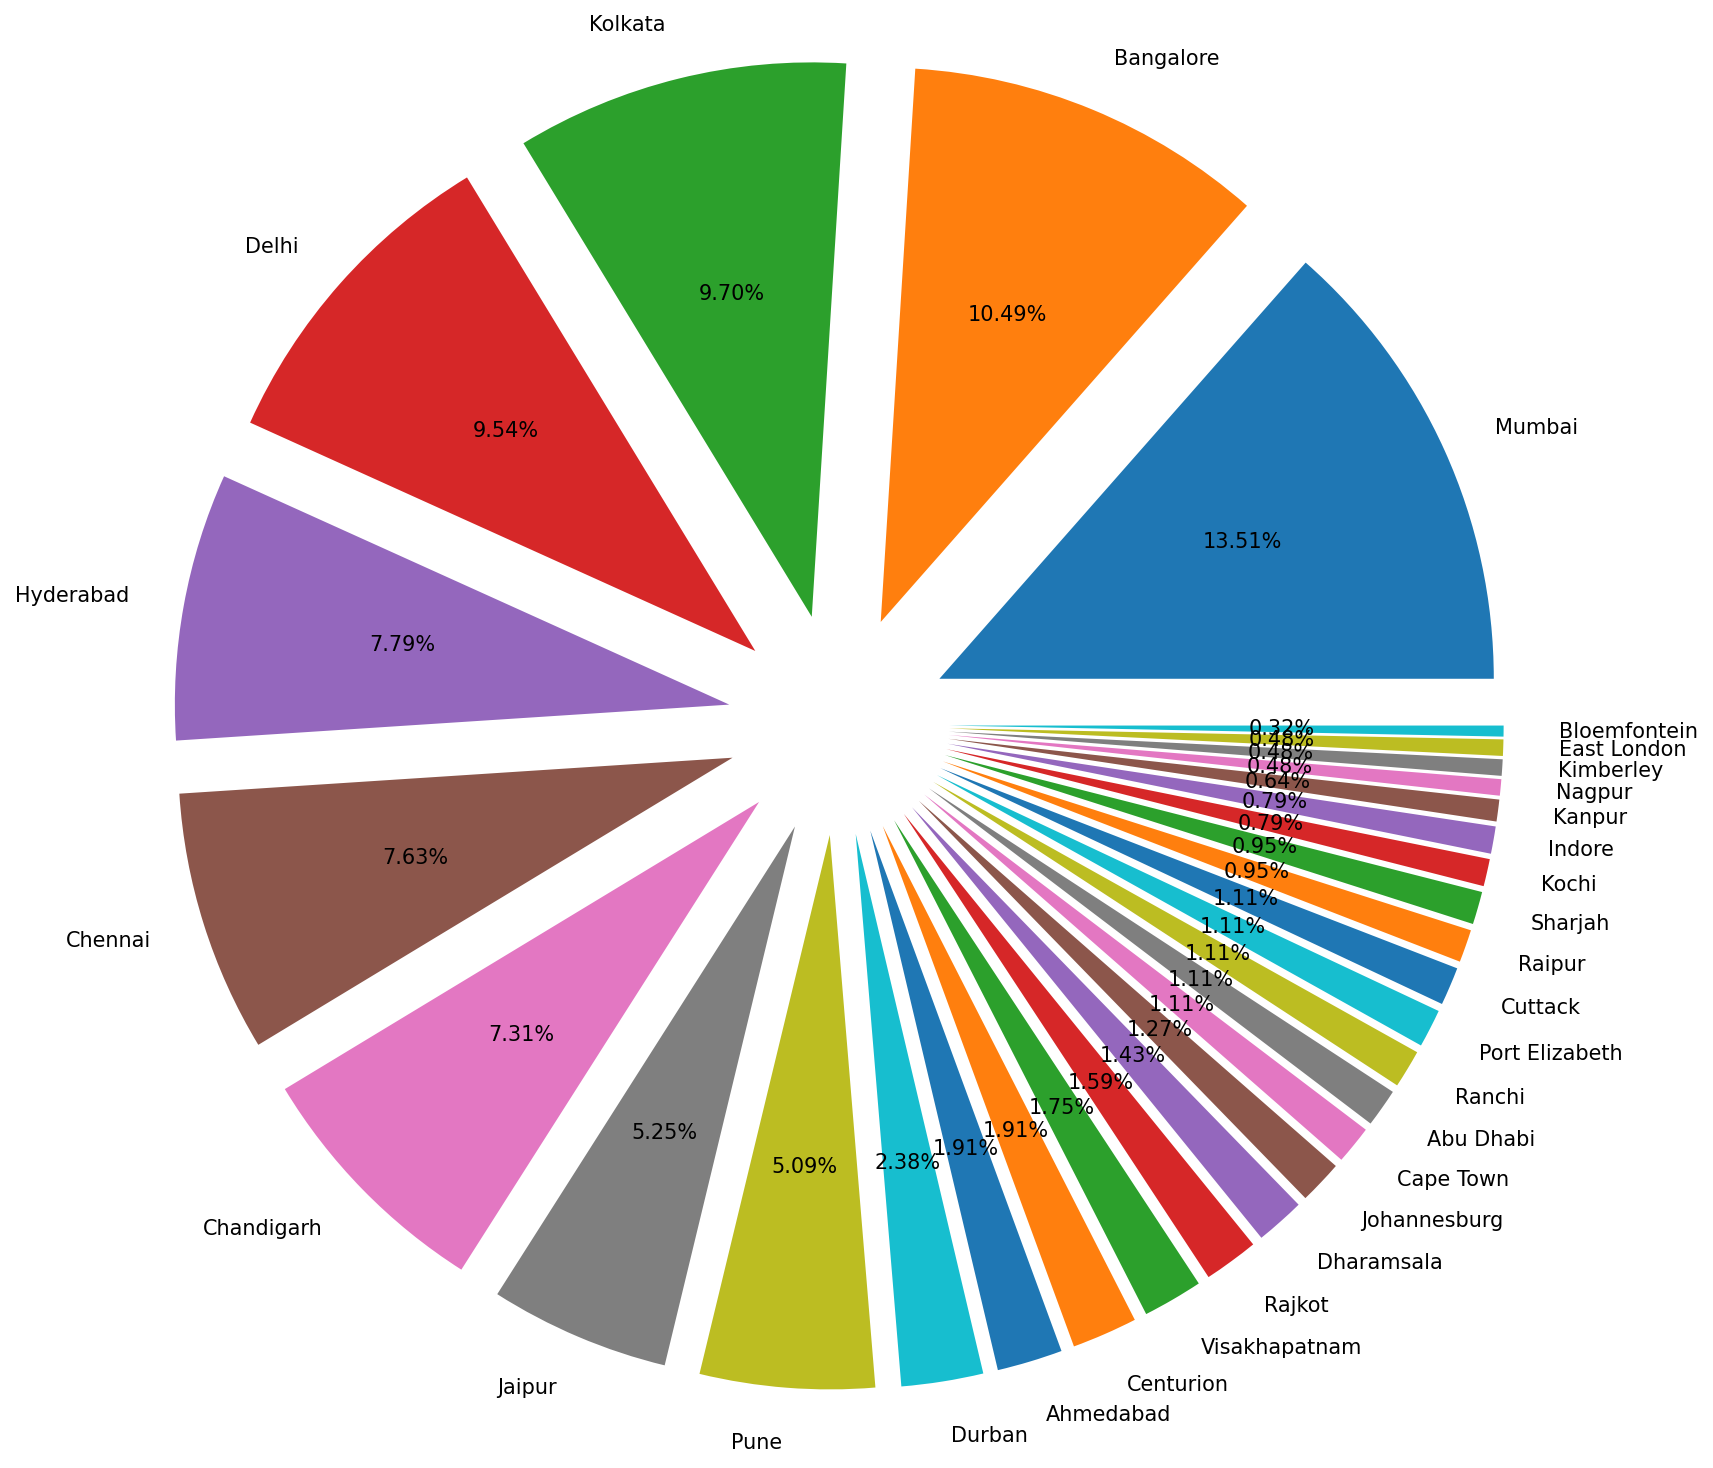

In [213]:
plt.figure(figsize=(15,12),dpi=150)
plt.pie(dt.city.value_counts(),labels=dt.city.value_counts().index,autopct='%.2f%%',explode=[0.2 for i in range(30)])

plt.show()

In [214]:
dt.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


# Total teams year wise

In [215]:
def year_wise(year):
    
    t1=dt[dt.season==year]['team1'].unique()
    t2=dt[dt.season==year]['team2'].unique()

    lst=[]

    for i in t1:
        lst.append(i)
    for i in t2:
        if i not in lst:
            lst.append(i)
    if lst==[]:
        return 'Not found'
    else:
        return lst

In [216]:
year_wise(2008)

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Deccan Chargers',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils']

In [217]:
for i in dt.season.unique():
    print(i,year_wise(i))
    print('*'*50)
    print()

2017 ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab']
**************************************************

2008 ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils']
**************************************************

2009 ['Mumbai Indians', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Rajasthan Royals']
**************************************************

2010 ['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Rajasthan Royals', 'Chennai Super Kings', 'Delhi Daredevils']
**************************************************

2011 ['Chennai Super Kings', 'Deccan Chargers', 'Kochi Tuskers K

# Number of matches won by each team in 2017

In [218]:
def matches_won(year):
    return dt[dt.season==year]['winner'].value_counts()

In [219]:
def bar_plot(year):
    plt.figure(figsize=(18,6),dpi=100)
    ax=sns.barplot(x=dt[dt.season==year]['winner'].value_counts().index,y=dt[dt.season==year]['winner'].value_counts().values)
    for i in ax.containers:
        ax.bar_label(i)

# Number of matches won by each team in 2012

In [220]:
matches_won(2012)

Kolkata Knight Riders          12
Delhi Daredevils               11
Mumbai Indians                 10
Chennai Super Kings            10
Royal Challengers Bangalore     8
Kings XI Punjab                 8
Rajasthan Royals                7
Pune Warriors                   4
Deccan Chargers                 4
Name: winner, dtype: int64

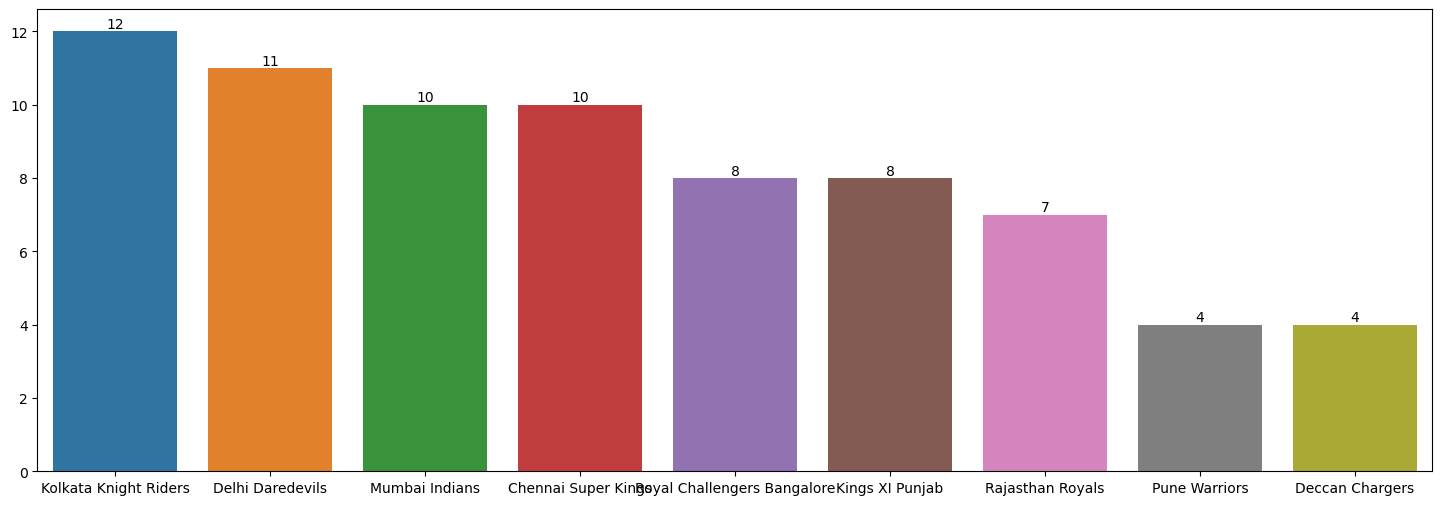

In [221]:
bar_plot(2012)

# Number of matches won by each team in 2008

In [222]:
matches_won(2008)

Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64

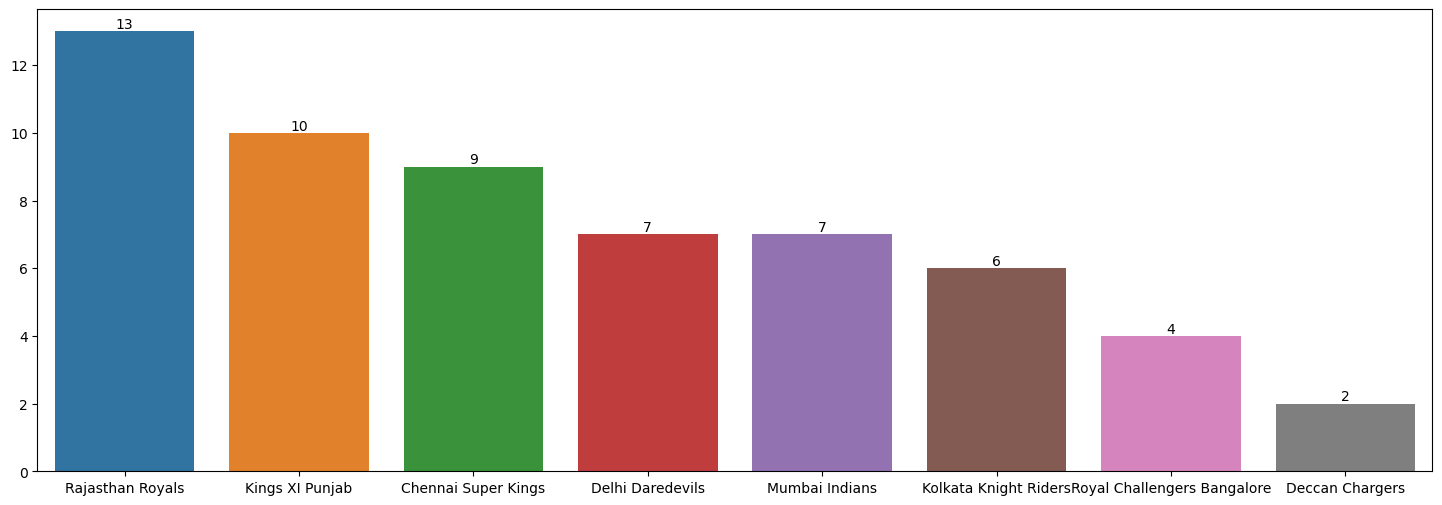

In [223]:
bar_plot(2008)

In [224]:
dt.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Number of matches won by each team in 2015

In [225]:
matches_won(2015)

Chennai Super Kings            10
Mumbai Indians                 10
Royal Challengers Bangalore     8
Kolkata Knight Riders           7
Rajasthan Royals                7
Sunrisers Hyderabad             7
Delhi Daredevils                5
Kings XI Punjab                 3
Name: winner, dtype: int64

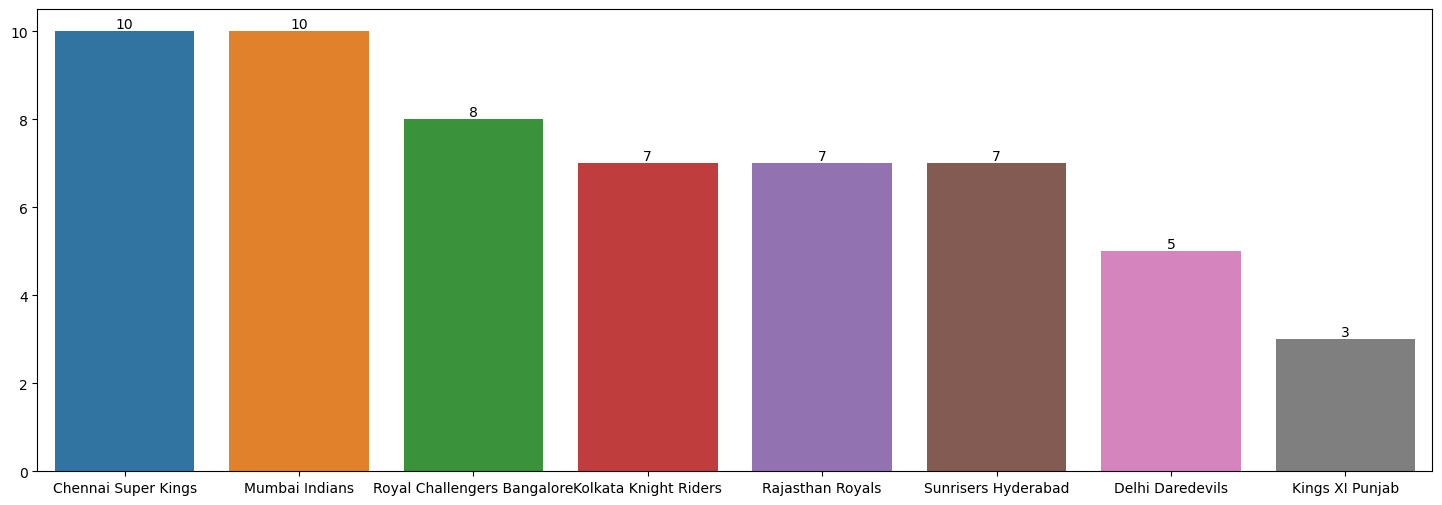

In [226]:
bar_plot(2015)

# Maximum toss winner in each year

In [227]:
dt.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

In [228]:
def toss_winner(year):
    return dt[dt.season==year]['toss_winner'].value_counts()

In [229]:
for i in dt.season.unique():
    print(i,toss_winner(i).index[0],toss_winner(i).values[0],sep='---')
    print()

2017---Mumbai Indians---11

2008---Rajasthan Royals---11

2009---Deccan Chargers---10

2010---Chennai Super Kings---10

2011---Kings XI Punjab---10

2012---Mumbai Indians---11

2013---Kolkata Knight Riders---12

2014---Chennai Super Kings---10

2015---Chennai Super Kings---10

2016---Sunrisers Hyderabad---10



In [230]:
for i in dt:
    print(i)

season
city
team1
team2
toss_winner
toss_decision
result
dl_applied
winner
win_by_runs
win_by_wickets
player_of_match
venue


# Minimum toss winner in each year

In [231]:
def minimum_toss(year):
    x=dt[dt.season==year]['toss_winner'].value_counts()
    print(year,x.index[-1],x[-1],sep='--')

In [232]:
for i in dt.season.unique():
    minimum_toss(i)

2017--Kings XI Punjab--4
2008--Chennai Super Kings--5
2009--Rajasthan Royals--4
2010--Kings XI Punjab--5
2011--Pune Warriors--5
2012--Royal Challengers Bangalore--6
2013--Delhi Daredevils--5
2014--Delhi Daredevils--4
2015--Delhi Daredevils--5
2016--Kings XI Punjab--6


In [242]:
dt[dt.season==2012]['toss_winner'].value_counts().index[-1]

'Royal Challengers Bangalore'

In [243]:
dt[dt.season==2012]['toss_winner'].value_counts().values[-1]

6

In [246]:
year=[]
team=[]
toss=[]

for i in dt.season.unique():
    year.append(i)
    x=dt[dt.season==i]['toss_winner'].value_counts()
    team.append((x.index[-1]))
    toss.append(x[-1])

In [247]:
print(team)

['Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Kings XI Punjab', 'Pune Warriors', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Delhi Daredevils', 'Delhi Daredevils', 'Kings XI Punjab']


In [248]:
year

[2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [249]:
toss

[4, 5, 4, 5, 5, 6, 5, 4, 5, 6]

In [255]:
minimum_toss=pd.DataFrame({'Year':year,'Team':team,'Toss':toss})
minimum_toss=minimum_toss.sort_values(by='Toss',ascending=False)
minimum_toss

,Year,Team,Toss
5,2012,Royal Challengers Bangalore,6
9,2016,Kings XI Punjab,6
1,2008,Chennai Super Kings,5
3,2010,Kings XI Punjab,5
4,2011,Pune Warriors,5
6,2013,Delhi Daredevils,5
8,2015,Delhi Daredevils,5
0,2017,Kings XI Punjab,4
2,2009,Rajasthan Royals,4
7,2014,Delhi Daredevils,4


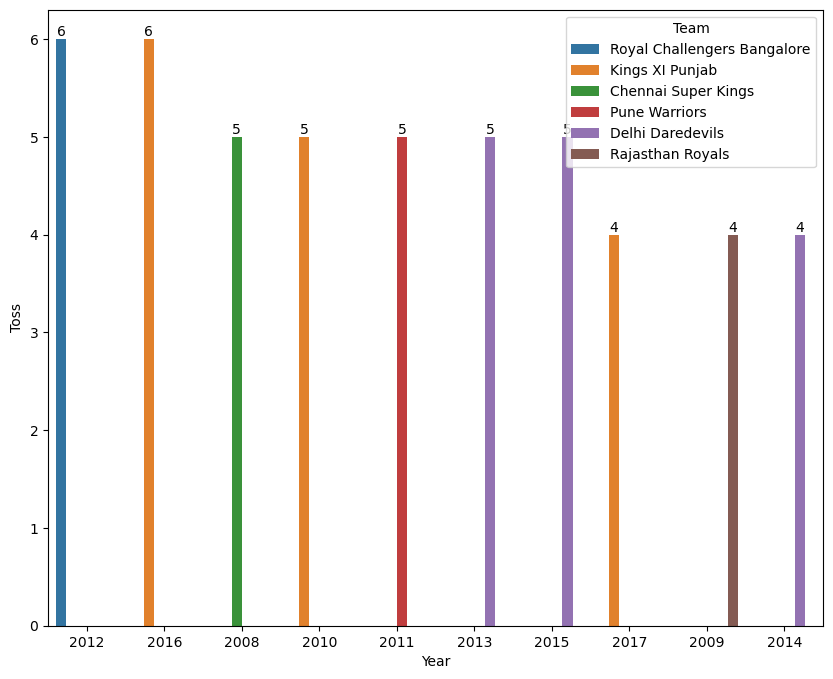

In [260]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Year',y='Toss',hue='Team',data=minimum_toss,order=minimum_toss['Year'])

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [271]:
year=2017
x=dt[dt.season==year]['toss_winner'].value_counts()
x

Mumbai Indians                 11
Royal Challengers Bangalore     9
Kolkata Knight Riders           9
Delhi Daredevils                8
Gujarat Lions                   7
Rising Pune Supergiant          6
Sunrisers Hyderabad             5
Kings XI Punjab                 4
Name: toss_winner, dtype: int64

In [272]:
x.index[0]

'Mumbai Indians'

In [273]:
print(x[0])

11


In [276]:
print(year,x.index[0],x[0],sep='--')

2017--Mumbai Indians--11


In [277]:
x

Mumbai Indians                 11
Royal Challengers Bangalore     9
Kolkata Knight Riders           9
Delhi Daredevils                8
Gujarat Lions                   7
Rising Pune Supergiant          6
Sunrisers Hyderabad             5
Kings XI Punjab                 4
Name: toss_winner, dtype: int64

In [279]:
x.index[-1]

'Kings XI Punjab'

In [280]:
x[-1]

4

In [290]:
year=2008
x=dt[dt.season==year]['toss_winner'].value_counts()
print(x)

Rajasthan Royals               11
Deccan Chargers                 9
Mumbai Indians                  8
Kings XI Punjab                 8
Kolkata Knight Riders           6
Delhi Daredevils                6
Royal Challengers Bangalore     5
Chennai Super Kings             5
Name: toss_winner, dtype: int64


In [291]:
dt.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [293]:
dt.groupby('city').winner.value_counts()

city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Chennai Super Kings        1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 191, dtype: int64

In [310]:
x=dt.groupby('season').toss_winner.value_counts()
x.loc[2009].index[0]
x.loc[2009][0]

10

# After winning the toos chose filed or bat

In [6]:
dt.toss_decision.value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

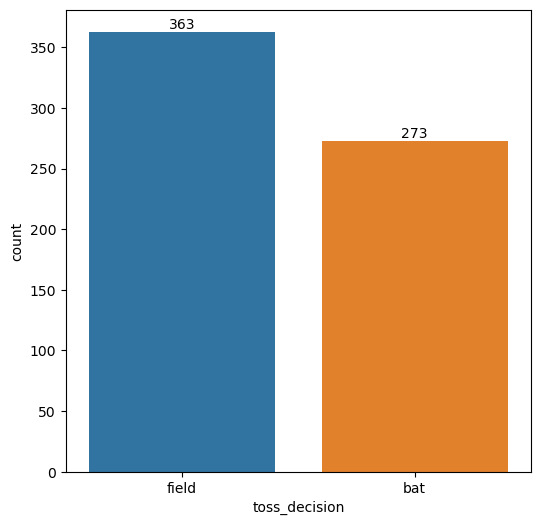

In [9]:
plt.figure(figsize=(6,6),dpi=100)
ax=sns.countplot(x='toss_decision',data=dt)

for i in ax.containers:
    ax.bar_label(i)

# Winning by runs teamwise and season wise

In [30]:
x=dt[dt['season']==2017].groupby(['winner']).win_by_runs.value_counts()
x.index

MultiIndex([(           'Delhi Daredevils',   0),
            (           'Delhi Daredevils',   7),
            (           'Delhi Daredevils',  51),
            (           'Delhi Daredevils',  97),
            (              'Gujarat Lions',   0),
            (            'Kings XI Punjab',   0),
            (            'Kings XI Punjab',   7),
            (            'Kings XI Punjab',  14),
            (            'Kings XI Punjab',  19),
            (            'Kings XI Punjab',  26),
            (      'Kolkata Knight Riders',   0),
            (      'Kolkata Knight Riders',  17),
            (      'Kolkata Knight Riders',  82),
            (             'Mumbai Indians',   0),
            (             'Mumbai Indians',   1),
            (             'Mumbai Indians',   9),
            (             'Mumbai Indians',  14),
            (             'Mumbai Indians', 146),
            (     'Rising Pune Supergiant',   0),
            (     'Rising Pune Supergiant',   3),


In [24]:
# pd.pivot_table(dt,index='season',columns='team1',values='win_by_runs',aggfunc='va)

In [40]:
def win_runs(year,team):
    return dt[(dt.season==year)&(dt.winner==team)][['winner','win_by_runs','win_by_wickets']]

In [42]:
win_runs(2016,'Kings XI Punjab')

,winner,win_by_runs,win_by_wickets
585,Kings XI Punjab,0,6
603,Kings XI Punjab,23,0
611,Kings XI Punjab,9,0
618,Kings XI Punjab,0,7


# Winning by maximum runs for all teams in 2008

In [46]:
def max_runs(year,team):
    return win_runs(year,team)['win_by_runs'].max()

In [48]:
max_runs(2008,'Royal Challengers Bangalore')

14

In [97]:
def team_win_by_runs(year):
    t=[]
    r=[]
    for i in dt.winner.unique():
        x=max_runs(year,i)
        t.append(i)
        r.append(x)
    x=pd.DataFrame({'Team':t,'Win_by_maximum_runs':r})
    x.dropna(inplace=True)
    x=x.sort_values(by='Win_by_maximum_runs',ascending=False,ignore_index=True)
    return x

In [98]:
team_win_by_runs(2009)

,Team,Win_by_maximum_runs
0,Mumbai Indians,92.0
1,Chennai Super Kings,92.0
2,Rajasthan Royals,78.0
3,Royal Challengers Bangalore,75.0
4,Deccan Chargers,53.0
5,Kings XI Punjab,27.0
6,Delhi Daredevils,14.0
7,Kolkata Knight Riders,11.0


# Winning by runs of the teams in Descending order in 2017

,Team,Win_by_maximum_runs
0,Mumbai Indians,146.0
1,Delhi Daredevils,97.0
2,Kolkata Knight Riders,82.0
3,Rising Pune Supergiant,61.0
4,Sunrisers Hyderabad,48.0
5,Kings XI Punjab,26.0
6,Royal Challengers Bangalore,21.0
7,Gujarat Lions,0.0


In [104]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
def plot_maximum_runs(year):
    x=team_win_by_runs(year)
    x
    plt.figure(figsize=(20,6),dpi=100)
    sns.barplot('Team','Win_by_maximum_runs',data=x)
    plt.show()

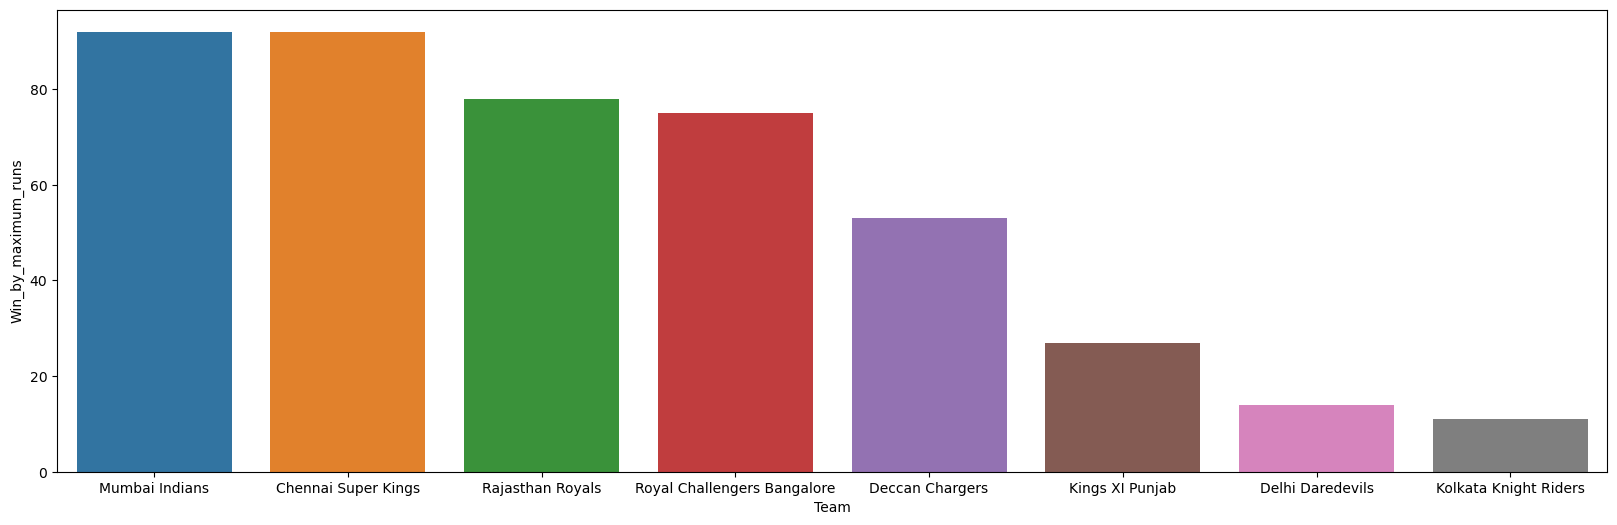

In [119]:
try:
    plot_maximum_runs(2009)
except:
    print('No record found')

# Man of the matches by year

In [132]:
def man_of_the_match(year):
    return pd.DataFrame({'Player':dt[dt.season==year].player_of_match.value_counts().index,'Matches':dt[dt.season==year].player_of_match.value_counts().values})

In [139]:
man_of_the_match(2009)

,Player,Matches
0,YK Pathan,3
1,SR Tendulkar,2
2,KC Sangakkara,2
3,MK Pandey,2
4,LRPL Taylor,2
5,ML Hayden,2
6,RG Sharma,2
7,DPMD Jayawardene,2
8,Yuvraj Singh,2
9,JP Duminy,2


In [145]:
dt[(dt.season==2008)&(dt.winner=='Chennai Super Kings')][['winner','win_by_runs','season','win_by_wickets']]

,winner,win_by_runs,season,win_by_wickets
60,Chennai Super Kings,33,2008,0
66,Chennai Super Kings,6,2008,0
70,Chennai Super Kings,0,2008,9
73,Chennai Super Kings,13,2008,0
86,Chennai Super Kings,0,2008,4
90,Chennai Super Kings,18,2008,0
102,Chennai Super Kings,3,2008,0
113,Chennai Super Kings,0,2008,7
115,Chennai Super Kings,0,2008,9
